<a href="https://colab.research.google.com/github/ma22c041/ma22c041_2023_PL/blob/main/Assignment7/The_SEIR_model_of_infectious_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

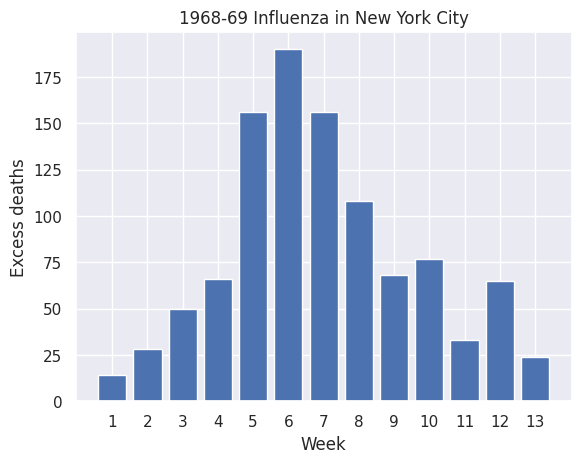

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set();
plt.bar(range(1,14), [14,28,50,66,156,190,156,108,68,77,33,65,24])
plt.xlabel('Week');  plt.ylabel('Excess deaths'); plt.xticks(range(1,14));
plt.title('1968-69 Influenza in New York City');

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np

In [ ]:
def seir_f(t, y, beta, sigma, gamma):
    s, e, i, r = y
    return np.array([-beta * i * s, -sigma * e + beta * i * s, -gamma * i + sigma * e, gamma * i])

In [ ]:
# try some parameter values
beta = 1
sigma = 1
gamma = 0.1

In [ ]:
sol = solve_ivp(seir_f, [0, 60], [0.99, 0.01, 0, 0],
                rtol=1e-6, args=(beta, sigma, gamma))

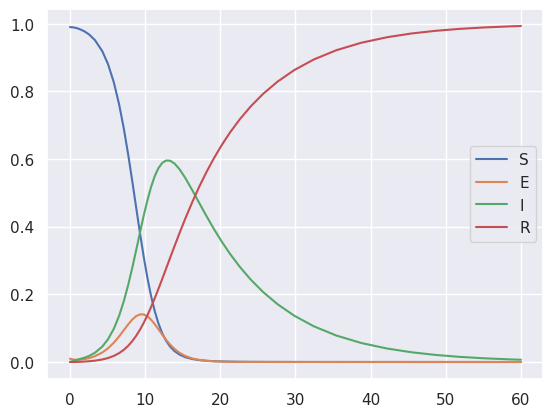

In [ ]:
fig = plt.figure(); ax = fig.gca()
curves = ax.plot(sol.t, sol.y.T)
ax.legend(curves, ['S', 'E', 'I', 'R']);

In [ ]:
def plot_ei(beta=1, sigma=1, gamma=0.1, s0=0.99, e0=0.01, i0=0, r0=0, t1=60):
# apply ODE solver sol = solve_ivp(seir_f, [0, t1], [s0, e0, i0, r0], rtol=1e-7, args=(beta, sigma, gamma))
# plot I and E components
    fig = plt.figure();
    ax = fig.gca()
    ax.plot(sol.t, sol.y[1, :].T, color='brown', linestyle='dashed', label='Exposed')
    ax.plot(sol.t, sol.y[2, :].T, color='red', label='Infected')
    ax.legend()
    return ax

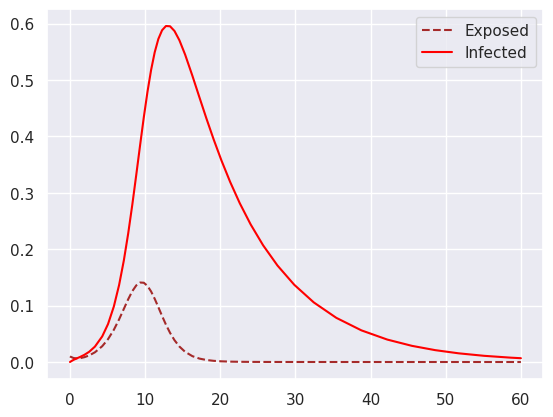

In [ ]:
plot_ei(); # baseline with the default parameters above

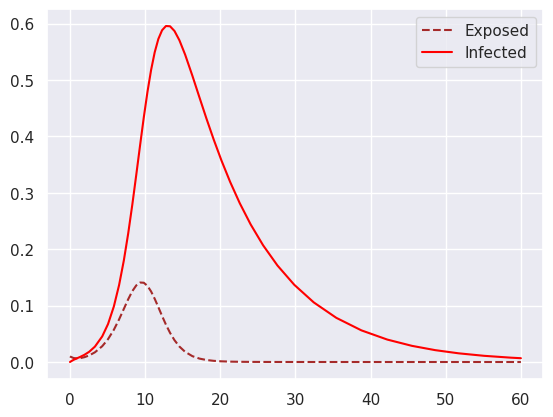

In [ ]:
plot_ei(beta=0.5); # what happens if beta is reduced?

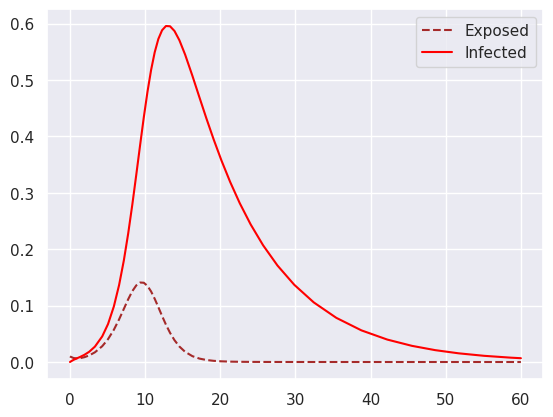

In [ ]:
plot_ei(gamma=0.5); # what happens if gamma is increased?

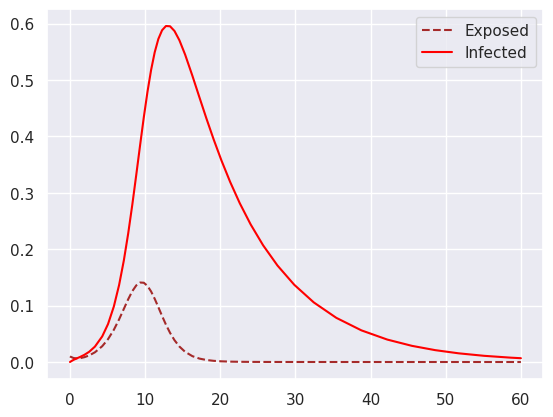

In [ ]:
plot_ei(sigma=0.1); # what's the effect of sigma?

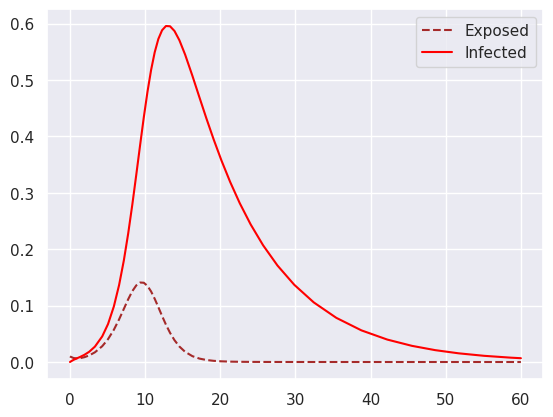

In [ ]:
def seir_f2(t, y, beta, sigma, gamma, a, b):
    s, e, i, r = y
    return np.array([-beta * i * s + a, -sigma * e + beta * i * s + b,-gamma * i + sigma * e, gamma * i -(a + b)])
def plot_ei2(beta=1, sigma=1, gamma=0.1, a=0.005, b=0.001, t1=150): sol = solve_ivp(seir_f2, [0, t1], [0.99, 0.01, 0, 0], rtol=1e-7, args=(beta, sigma, gamma, a, b))
fig = plt.figure(); ax = fig.gca()
ax.plot(sol.t, sol.y[1, :].T, color='brown', linestyle='dashed',label='Exposed')
ax.plot(sol.t, sol.y[2, :].T, color='red', label='Infected')
ax.legend()

In [ ]:
plot_ei2(a=0.005, b=0.001)

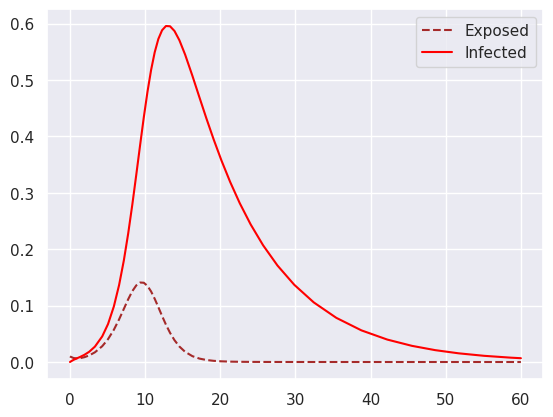

In [ ]:
plot_ei(beta=0.6, gamma=1, s0=0.9, i0=0.1);

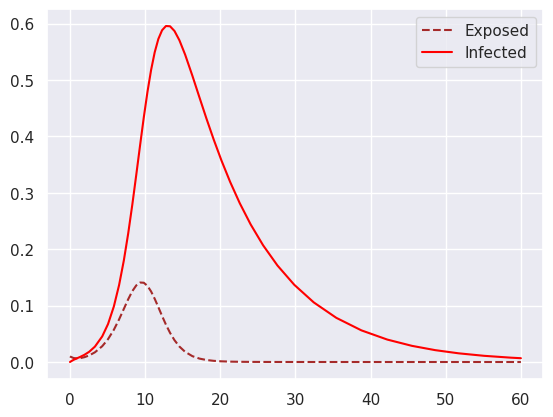

In [ ]:
plot_ei(beta=1, gamma=0.5, s0=0.9, i0=0.1);

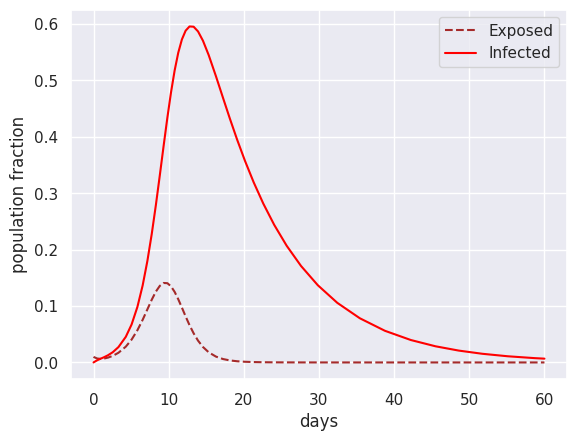

In [ ]:
ax = plot_ei(beta=2.2/2.3, sigma=1/5.2, gamma=1/2.3, i0=0.02/100, e0=3*0.02/100, t1=100)
ax.set_xlabel('days');
ax.set_ylabel('population fraction');